In [23]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [24]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target

In [25]:
iris1 = iris_df.loc[iris_df.target.isin([1,2]), ['petal length (cm)', 'petal width (cm)', 'target']]
iris1

,petal length (cm),petal width (cm),target
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1
53,4.0,1.3,1
54,4.6,1.5,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [26]:
X = iris1[['petal length (cm)', 'petal width (cm)']]
y = iris1.target

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

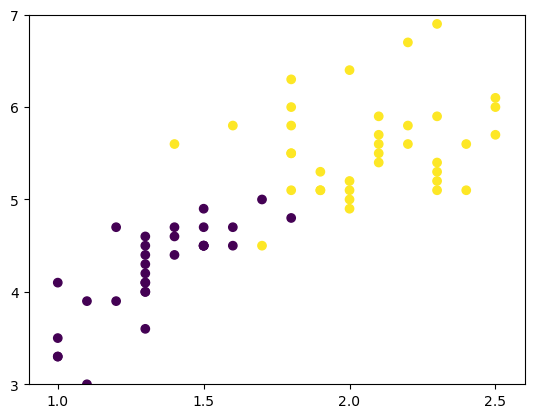

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x = X_train['petal width (cm)'],
           y = X_train['petal length (cm)'],
           c = y_train,
           cmap = 'viridis')
ax.set(xlim=(0.9, 2.6), xticks=[1, 1.5, 2, 2.5],
       ylim=(3,7), yticks=[3,4,5,6,7])
plt.show()

In [34]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\Users\ricar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[19,  0],
       [ 6,  8]], dtype=int64)

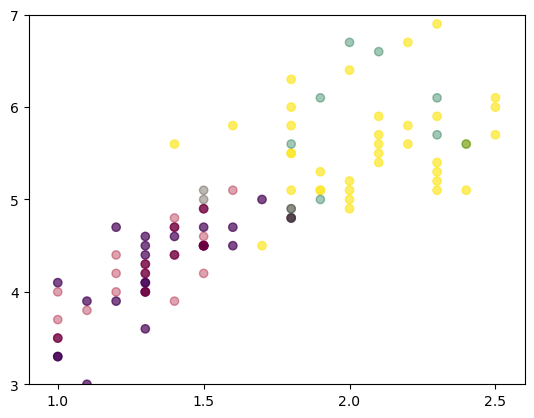

In [40]:
fig, ax = plt.subplots()

ax.scatter(x = X_train['petal width (cm)'],
           y = X_train['petal length (cm)'],
           c = y_train, alpha=0.7,
           cmap = 'viridis')

ax.scatter(x = X_test['petal width (cm)'],
           y = X_test['petal length (cm)'],
           c = y_pred, alpha=0.2,
           cmap = 'RdYlGn')

ax.scatter(x = X_test['petal width (cm)'],
           y = X_test['petal length (cm)'],
           c = y_test, alpha=0.2,
           cmap = 'RdYlGn')

ax.set(xlim=(0.9, 2.6), xticks=[1, 1.5, 2, 2.5],
       ylim=(3,7), yticks=[3,4,5,6,7])
plt.show()

In [41]:
X_test[y_test != y_pred]

,petal length (cm),petal width (cm)
133,5.1,1.5
123,4.9,1.8
126,4.8,1.8
127,4.9,1.8
138,4.8,1.8
119,5.0,1.5
